#Tensorflow verzió kiválasztás

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Importok

In [2]:
import struct
from PIL import Image, ImageEnhance
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Függvények definiálása

### Keverés

In [3]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

### Batch felosztás

In [4]:
def batch_generator(batch_size,steps,starting):
  idx = starting
  while True:
    yield load_data(idx,batch_size)
    if idx < steps:
      idx+=1
    else:
      idx = starting
def load_data(idx,batch_Size):
  df = train_x[idx*batch_size:idx*batch_size + batch_size]
  lb = train_y[idx*batch_size:idx*batch_size + batch_size]
  return (df,lb)

# Model paraméterek beállítása vagy modell betöltése

In [12]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/models/cnn33.h5')

output_dim = 3037
input_dim = 4032
nb_epoch = 60
batch_size = 759
steps_per_epoch = np.ceil(485760/batch_size)
validation_steps = np.ceil(60720/batch_size) 
#steps_per_epoch = np.ceil(728640/batch_size)
#validation_steps = np.ceil(91080/batch_size) 
my_training_batch_generator = batch_generator(batch_size,steps_per_epoch,starting=0)
my_validation_batch_generator = batch_generator(batch_size,validation_steps,starting=640)

# Adatok beolvasása

### 63x64-es adat beolvasása

In [ ]:
train_x= np.asarray(pd.read_csv("/content/drive/My Drive/data.csv",nrows=485760,dtype="uint8"),dtype="uint8").reshape(485760,63,64,1)
train_y= pd.read_csv("/content/drive/My Drive/labels.csv",nrows=485760)
val_x = np.asarray(pd.read_csv("/content/drive/My Drive/data.csv",skiprows=485760,nrows=60720,dtype="uint8"),dtype="uint8").reshape(60720,63,64,1)
val_y = pd.read_csv("/content/drive/My Drive/labels.csv",skiprows=485760,nrows=60720)
test_x = np.asarray(pd.read_csv("/content/drive/My Drive/data.csv",skiprows=546480,nrows=60719,dtype="uint8"),dtype="uint8").reshape(60719,63,64,1)
test_y = pd.read_csv("/content/drive/My Drive/labels.csv",skiprows=546480,nrows=60719)

### 32x32-es adat augmentált adat beolvasása

In [13]:
train_x= np.asarray(pd.read_csv("/content/drive/My Drive/data3.csv",nrows=728640,dtype="uint8"),dtype="uint8").reshape(728640,32,32,1)
train_y= pd.read_csv("/content/drive/My Drive/labels3.csv",nrows=728640,dtype="uint16")
val_x = np.asarray(pd.read_csv("/content/drive/My Drive/data3.csv",skiprows=728640,nrows=91080,dtype="uint8"),dtype="uint8").reshape(91080,32,32,1)
val_y = pd.read_csv("/content/drive/My Drive/labels3.csv",skiprows=728640,nrows=91080,dtype="uint16")
test_x = np.asarray(pd.read_csv("/content/drive/My Drive/data3.csv",skiprows=819720,nrows=91080,dtype="uint8"),dtype="uint8").reshape(91080,32,32,1)
test_y = np.asarray(pd.read_csv("/content/drive/My Drive/labels3.csv",skiprows=819720,nrows=91080,dtype="uint16"))

### Címkék one-hot kódolásra alakítása

In [14]:
train_y = np.asarray(tf.keras.utils.to_categorical(train_y,num_classes=3037),dtype="uint8")
val_y = np.asarray(tf.keras.utils.to_categorical(val_y,num_classes=3037),dtype="uint8")
test_y = np.asarray(tf.keras.utils.to_categorical(test_y,num_classes=3037),dtype="uint8")

#Model1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras import regularizers

model = Sequential()
model.add(Dense(256,input_dim=input_dim,activation='relu',))
model.add(Dense(128,input_dim=256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,input_dim=128,activation='relu'))
model.add(Dense(output_dim,input_dim=256,activation='softmax'))

#Model 2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten , Dropout
from keras.regularizers import l2 , l1 , l1_l2


model=Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=(63,64,1),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))
model.add(Dense(128,activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),input_shape=(32,32,1),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Conv2D(512,kernel_size=(3,3),input_shape=(16,16,1),strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))
model.add(Dense(128,activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(units=output_dim,activation="softmax"))


# Model 3

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten , Dropout
from keras.regularizers import l2 , l1 , l1_l2


model = Sequential()
model.add(Conv2D(filters=128,
          kernel_size=(3,3),
          input_shape=(32, 32, 1),
          strides=(1,1),
          padding='same',
          activation='relu'))
model.add(Conv2D(filters=128,
          kernel_size=(3,3),
          strides=(1,1),
          padding='same',
          activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(256,
          kernel_size=(3,3),
          strides=(1,1),
          padding='same',
          activation='relu'))
model.add(Conv2D(256,
          kernel_size=(3,3),
          strides=(1,1),
          padding='same',
          activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(units=output_dim, activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


#Tanítás

In [15]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 128)       1280      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)            

In [ ]:
result = model.fit_generator(my_training_batch_generator,
                    epochs=nb_epoch,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(val_x,val_y))

Epoch 1/60
639/640 [============================>.] - ETA: 0s - loss: 3.7161 - acc: 0.3231Epoch 1/60
60720/640 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Modell elmentése

In [ ]:
model.save('/content/drive/My Drive/models/cnn05.h5')

# Teszt adat

In [17]:
predictions = model.predict(test_x)

# Teszt adat eredménye



In [19]:
incorrect = 0
for i in range(len(predictions)):
  if(np.argmax(predictions[i]) != np.argmax(test_y[i])):
    incorrect += 1
print("Accuracy: " + str( (round((len(predictions)-incorrect) / len(predictions)*100,2) )) + "%")

Accuracy: 91.77%


In [23]:
import sys
np.set_printoptions(threshold=sys.maxsize)

order = np.argsort(predictions[133], axis=-1, kind='quicksort', order=None)[::-1]

for i in range(10):
  print(str(predictions[108][order[i]] * 100) + "% : " + str(order[i]))

44.86517608165741% : 2739
36.972230672836304% : 185
15.000888705253601% : 422
1.0489734821021557% : 1394
0.5405526142567396% : 719
0.5215924233198166% : 981
0.27749580331146717% : 1977
0.22466424852609634% : 1364
0.17028589500114322% : 1013
0.095083296764642% : 1479


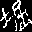

100: Guess: 730Correct: 2666


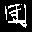

104: Guess: 118Correct: 1893


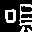

108: Guess: 2739Correct: 185


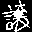

109: Guess: 577Correct: 1476


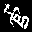

133: Guess: 1393Correct: 1572


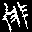

134: Guess: 2284Correct: 2281


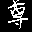

139: Guess: 1651Correct: 1789


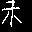

146: Guess: 310Correct: 2707


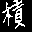

164: Guess: 1419Correct: 1624


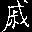

175: Guess: 121Correct: 1619


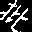

177: Guess: 2417Correct: 2394


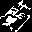

189: Guess: 489Correct: 2883


In [21]:
for i in range(100,200):
  if(np.argmax(predictions[i]) != np.argmax(test_y[i])):
    abc = test_x.reshape(len(test_x),32,32)
    img = Image.fromarray(np.uint8(abc[i] * 255) , 'L')
    display(img)
    print( str(i) + ": Guess: " +  str(np.argmax(predictions[i])) + "Correct: " + str(np.argmax(test_y[i])))